In [126]:
import torchio as tio
import os
import nibabel as nib
from nilearn.image import resample_to_img
import numpy as np
from PIL import Image, ImageDraw, ImageFont
from scipy.ndimage import shift, zoom
from matplotlib import pyplot as plt



In [127]:
def get_baseline_np(pre: np.ndarray, post: np.ndarray) -> np.ndarray:
    diff = np.abs(pre - post)
    return diff

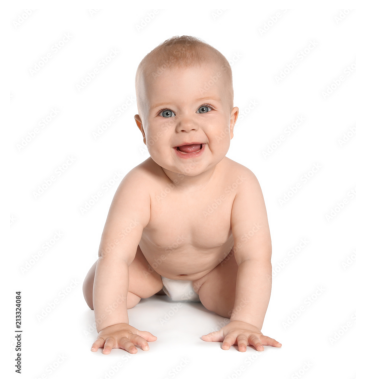

In [128]:
baseImage = Image.open("./images/baby.jpg")
plt.imshow(baseImage)
plt.axis('off')  # Hide the axis
plt.show()

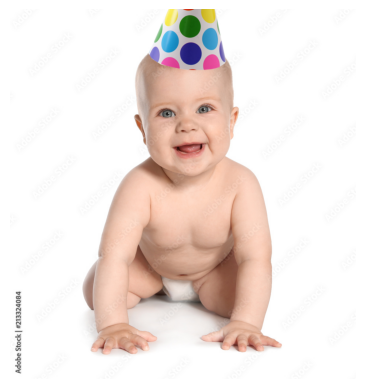

In [129]:
baseImage = Image.open("./images/baby.jpg")
hatImage = Image.open("./images/party_hat.png")
hatImage = hatImage.resize((220, 370))
# if hatImage.mode != 'RGBA':
#     hatImage = hatImage.convert('RGBA')
# if baseImage.mode != 'RGBA':
#     baseImage = baseImage.convert('RGBA')
baseImage.paste(hatImage, (370, -200), hatImage)


plt.imshow(baseImage.convert('RGB'))
plt.axis('off')  # Hide the axis
plt.show()

(1000, 906)
(1000, 906)


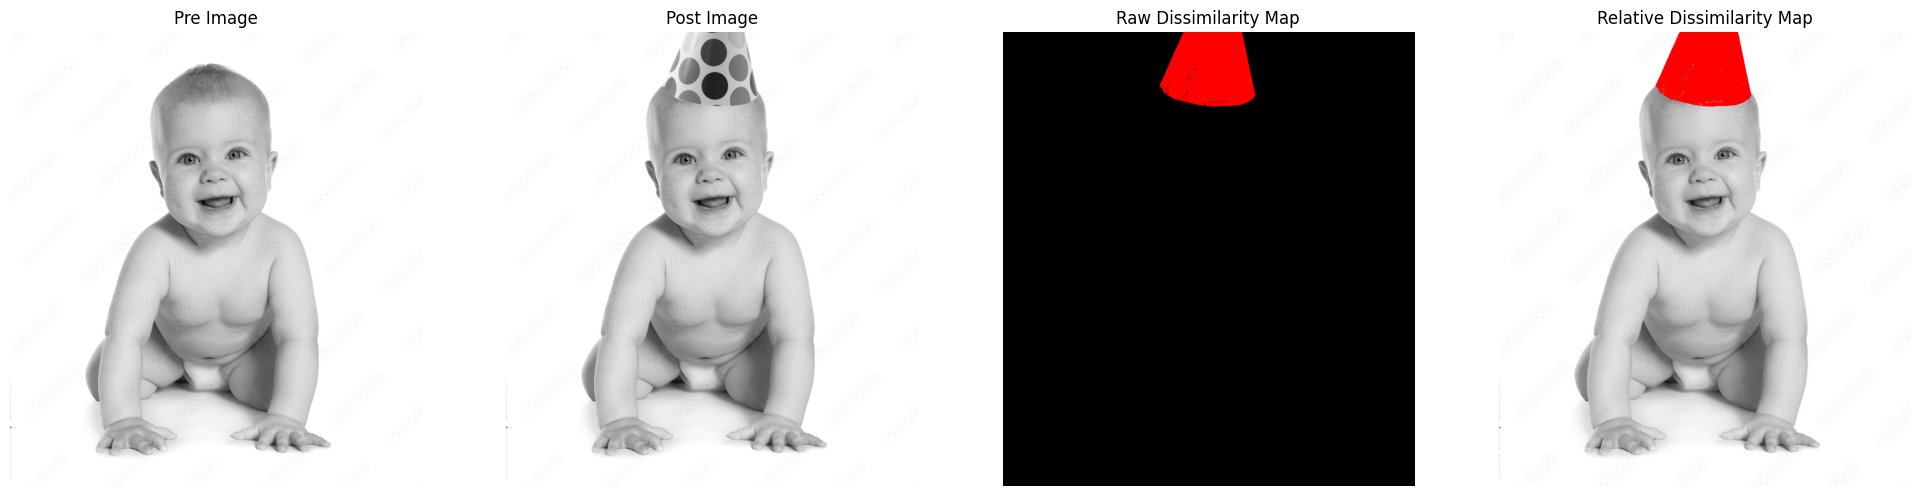

In [152]:
pre = Image.open("./images/baby.jpg")
post = baseImage
pre = pre.convert('L')  # Convert the 'pre' image to grayscale
post = post.convert('L')  # Convert the 'post' image to grayscale
pre = np.array(pre)[:,:]
post = np.array(post)[:,:]
pre = pre[:, 30:]
post = post[:, 30:]
diff = get_baseline_np(pre, post)
# Plot the pre image
print(pre.shape)
print(pre.shape)
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

# Plot the pre image
axs[0].imshow(pre, cmap='gray')
axs[0].set_title('Pre Image')
axs[0].axis('off')

# Plot the post image
axs[1].imshow(post, cmap='gray')
axs[1].set_title('Post Image')
axs[1].axis('off')

# Create the mask for the difference
mask = diff > 1  # Mask with True for pixels where difference is greater than 1

# Create a copy of the raw dissimilarity map to overlay the red mask
raw_diff_overlay = np.stack([diff] * 3, axis=-1)  # Convert grayscale diff to RGB

# Apply the red mask to the raw difference image
raw_diff_overlay[mask] = [255, 0, 0]  # Red color where the mask is True

# Plot the raw dissimilarity map with the mask
axs[2].imshow(raw_diff_overlay)
axs[2].set_title('Raw Dissimilarity Map')
axs[2].axis('off')

# Create a highlighted image with the red mask for the pre image
highlighted_image = np.copy(pre)

# Convert the grayscale pre image to RGB
highlighted_image_rgb = np.stack([highlighted_image] * 3, axis=-1)

# Set the red channel to 255 where the mask is True
highlighted_image_rgb[mask] = [255, 0, 0]  # Red color where the mask is True

# Plot the highlighted pre image with the red mask
axs[3].imshow(highlighted_image_rgb)
axs[3].set_title('Relative Dissimilarity Map')
axs[3].axis('off')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

(1000, 906)


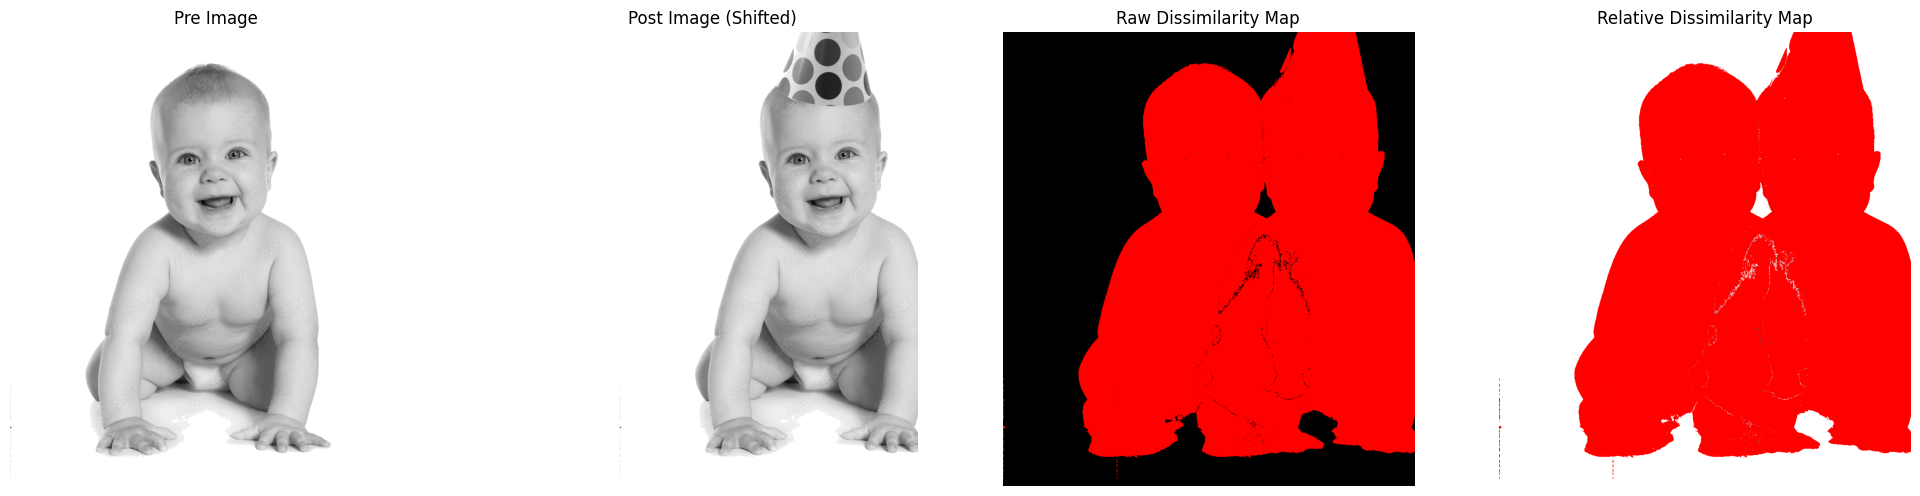

In [157]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Create a shifted version of 'post' (shift by 10 pixels to the right)
pre = Image.open("./images/baby.jpg")
post = baseImage
pre = pre.convert('L')  # Convert the 'pre' image to grayscale
post = post.convert('L')  # Convert the 'post' image to grayscale
pre = np.array(pre)[:,:]
post = np.array(post)[:,:]
pre = pre[:, 30:]
post = post[:, 30:]
shift_amount = 250
post[post > 240] = 255
pre[pre > 240] = 255
# Fill the newly created space with the left edge values (copy the first column)
shifted_post = np.zeros_like(post)

# Copy the contents of the 'post' image into the shifted image, starting at the 'shift_amount' position
shifted_post[:, shift_amount:] = post[:, :-shift_amount]

# Optional: Fill the newly created left part with black pixels (already zero) or the leftmost columns
shifted_post[:, :shift_amount] = 255 # Black fill, or you can fill it with the leftmost values

print(shifted_post.shape)
diff = get_baseline_np(pre, shifted_post)
# Create the mask for the difference
mask = diff > 1  # Mask with True for pixels where difference is greater than 1

# Create a copy of the raw dissimilarity map to overlay the red mask
raw_diff_overlay_shifted = np.stack([diff] * 3, axis=-1)  # Convert grayscale diff to RGB

# Apply the red mask to the raw difference image (shifted)
raw_diff_overlay_shifted[mask] = [255, 0, 0]  # Red color where the mask is True

# Plot the shifted images and the maps
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

# Plot the pre image
axs[0].imshow(pre, cmap='gray')
axs[0].set_title('Pre Image')
axs[0].axis('off')

# Plot the shifted post image
axs[1].imshow(shifted_post, cmap='gray')
axs[1].set_title('Post Image (Shifted)')
axs[1].axis('off')

# Plot the raw dissimilarity map with the mask (shifted)
axs[2].imshow(raw_diff_overlay_shifted)
axs[2].set_title('Raw Dissimilarity Map')
axs[2].axis('off')

# Create a highlighted image with the red mask for the pre image
highlighted_image_shifted = np.copy(pre)

# Convert the grayscale pre image to RGB
highlighted_image_rgb_shifted = np.stack([highlighted_image_shifted] * 3, axis=-1)

# Set the red channel to 255 where the mask is True
highlighted_image_rgb_shifted[mask] = [255, 0, 0]  # Red color where the mask is True

# Plot the highlighted pre image with the red mask
axs[3].imshow(highlighted_image_rgb_shifted)
axs[3].set_title('Relative Dissimilarity Map')
axs[3].axis('off')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()
